In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lists = pd.read_csv('/Users/vincentsalamand/Documents/Clubmama/db_exports/list_export.csv')
items = pd.read_csv('/Users/vincentsalamand/Documents/Clubmama/db_exports/item_export.csv', parse_dates=True)
categories = pd.read_csv('/Users/vincentsalamand/Documents/Clubmama/db_exports/category_export.csv')
store_sections = pd.read_csv('/Users/vincentsalamand/Documents/Clubmama/db_exports/store_section_export.csv')
foodgroups = pd.read_csv('/Users/vincentsalamand/Documents/Clubmama/db_exports/foodgroup_export.csv')
recipes = pd.read_csv('/Users/vincentsalamand/Documents/Clubmama/db_exports/recipe_export.csv')


In [173]:
data = pd.DataFrame()
data = items.merge(lists[['id', 'user_id']], left_on=['list_id'], right_on=['id'], how='inner', suffixes=('', '_list'))
data = data.merge(categories[['id', 'name', 'rating', 'ancestry']], left_on=['category_id'], right_on=['id'], how='left', suffixes=('', '_category'))
data = data.merge(store_sections[['id', 'name']], left_on=['store_section_id'], right_on=['id'], how='left', suffixes=('', '_store_section'))
data.drop(['food_id', 'list_item_id', 'unit_id', 'quantity', 'recipe_id', 'id_list', 'id_category', 'id_store_section'], axis=1, inplace=True)
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
data['list_id'] = data.list_id.astype(int)
data['store_section_id'] = data['store_section_id'].fillna(0)
data['store_section_id'] = data['store_section_id'].astype(int)
data['category_id'] = data['category_id'].fillna(0)
data['category_id'] = data['category_id'].astype(int)
data['rating'] = data['rating'].fillna(0)
data['rating'] = data['rating'].astype(int)
data = data[data['user_id'].notna()]
data['user_id'] = data['user_id'].fillna(0)
data['user_id'] = data['user_id'].astype(int)


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9453 entries, 0 to 9858
Data columns (total 16 columns):
id                    9453 non-null int64
created_at            9453 non-null datetime64[ns]
updated_at            9453 non-null datetime64[ns]
name                  9452 non-null object
is_validated          9453 non-null object
is_non_food           9453 non-null object
store_section_id      9453 non-null int64
list_id               9453 non-null int64
is_deleted            9453 non-null object
is_completed          9453 non-null object
category_id           9453 non-null int64
user_id               9453 non-null int64
name_category         8619 non-null object
rating                9453 non-null int64
ancestry              8618 non-null object
name_store_section    9436 non-null object
dtypes: datetime64[ns](2), int64(6), object(8)
memory usage: 1.2+ MB


In [175]:
data.head()

,id,created_at,updated_at,name,is_validated,is_non_food,store_section_id,list_id,is_deleted,is_completed,category_id,user_id,name_category,rating,ancestry,name_store_section
0,77777,2020-08-05 17:39:56.388822,2020-08-06 19:35:54.840718,3 morceaux d'avocat,f,f,1,747,t,f,137,1,Avocat,1,2/85/90,Légumes
1,77778,2020-08-05 17:40:04.343131,2020-08-06 12:07:27.100218,rosti,f,f,6,747,t,f,0,1,NaN,0,NaN,Épicerie salée
2,77779,2020-08-05 17:40:25.923727,2020-08-06 19:36:12.615089,boisson à l'épeautre,t,f,8,747,t,f,23,1,Boisson à l'épeautre,1,1/3/8,Boissons
3,77785,2020-08-05 18:02:22.243774,2020-08-06 19:36:05.771757,Knackis,f,f,3,747,t,f,313,1,Knacks,3,275/277/320,Frais
4,77784,2020-08-05 17:52:13.469362,2020-08-06 19:36:08.962831,Câpres,t,f,6,747,t,f,927,1,Câpres,1,439/727/807,Épicerie salée


In [177]:
data.groupby('user_id')['category_id'].value_counts()

user_id  category_id
1        0              83
         95             71
         605            59
         137            55
         97             47
         136            44
         279            43
         440            41
         219            40
         283            39
         145            35
         152            30
         184            29
         127            27
         284            26
         153            25
         535            25
         113            24
         161            24
         282            24
         518            23
         629            23
         14             22
         895            22
         902            19
         98             18
         182            18
         505            18
         913            17
         317            16
                        ..
700      245             1
         283             1
         284             1
         285             1
         286             1
       

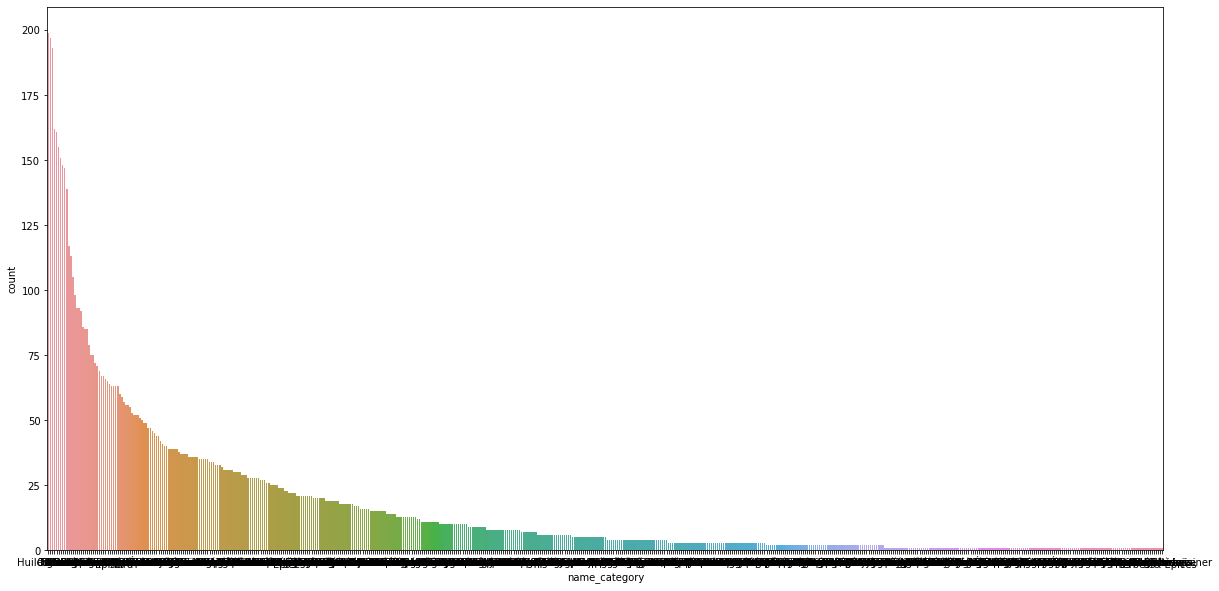

In [139]:
plt.figure(figsize=(20,10)) 
order = data['name_category'].value_counts().index
sns.countplot(data=data, x='name_category', order=order)

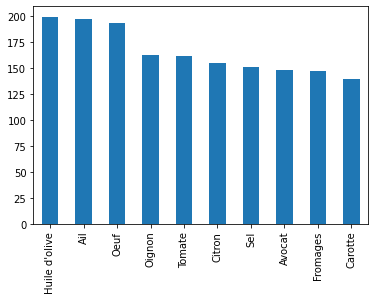

In [131]:
data['name_category'].value_counts().head(10).plot(kind='bar')

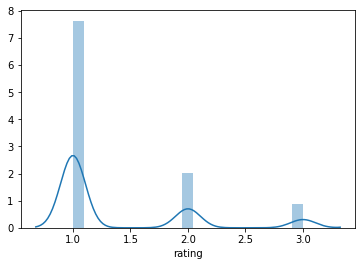

In [133]:
sns.distplot(data.rating)

In [141]:
np.random.rand(3,4)


array([[0.2132004 , 0.70788264, 0.94358237, 0.33774724],
       [0.21709733, 0.07687596, 0.13946959, 0.09905633],
       [0.96003018, 0.22796533, 0.46208111, 0.91955458]])